In [1]:
%matplotlib widget

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

from pyinverse.grid import RegularGrid
from pyinverse.axes import RegularAxes3
from pyinverse.phantom3 import Phantom3
from pyinverse.radon3 import radon_matrix

from pyviz3d.viz import Renderer

In [3]:
Nx = 46
Ny = 47
Nz = 48
axes3_viz = RegularAxes3.linspace((-1, 1, Nx), (-1, 1, Ny), (-1, 1, Nz))
axes3 = RegularAxes3.linspace((-1, 1, Nx), (-1, 1, Ny), (-1, 1, Nz))

In [4]:
Nu = 17
Nv = 18
grid_uv = RegularGrid.linspace((-1, 1, Nu), (-1, 1, Nv))

In [5]:
p3 = Phantom3()
e3_4 = p3._ellipsoids[4]

In [6]:
c_z, c_y, c_x = axes3.centers

In [7]:
X_e3 = e3_4(c_x.flatten(), c_y.flatten(), c_z.flatten())
X_e3.shape = axes3.shape

In [8]:
blank_ijk = list(zip(*np.where(X_e3==0)))

In [9]:
X_e3_actor =  axes3_viz.actor(X_e3, blank_cells=blank_ijk)

In [10]:
e3_4_actor = e3_4.actor()
e3_4_actor.GetProperty().SetOpacity(0.5)

In [11]:
ren = Renderer()
ren.depth_peeling_setup()
ren.add_actor(X_e3_actor)
ren.add_actor(e3_4_actor)
ren.axes_on((-1, 1, -1, 1, -1, 1))
ren.reset_camera()
#ren.start()

In [12]:
theta_deg = 25
phi_deg = 15

In [13]:
A = radon_matrix(theta_deg, phi_deg, axes3, grid_uv)

100%|█████████████████████████████████████████████████████████████████████████████████| 306/306 [14:06<00:00,  2.77s/it]


In [14]:
e3_4_proj = e3_4.proj(theta_deg, phi_deg, grid_uv, deg=True)

In [15]:
e3_4_proj_approx = A @ X_e3.flat
e3_4_proj_approx.shape = Nv, Nu

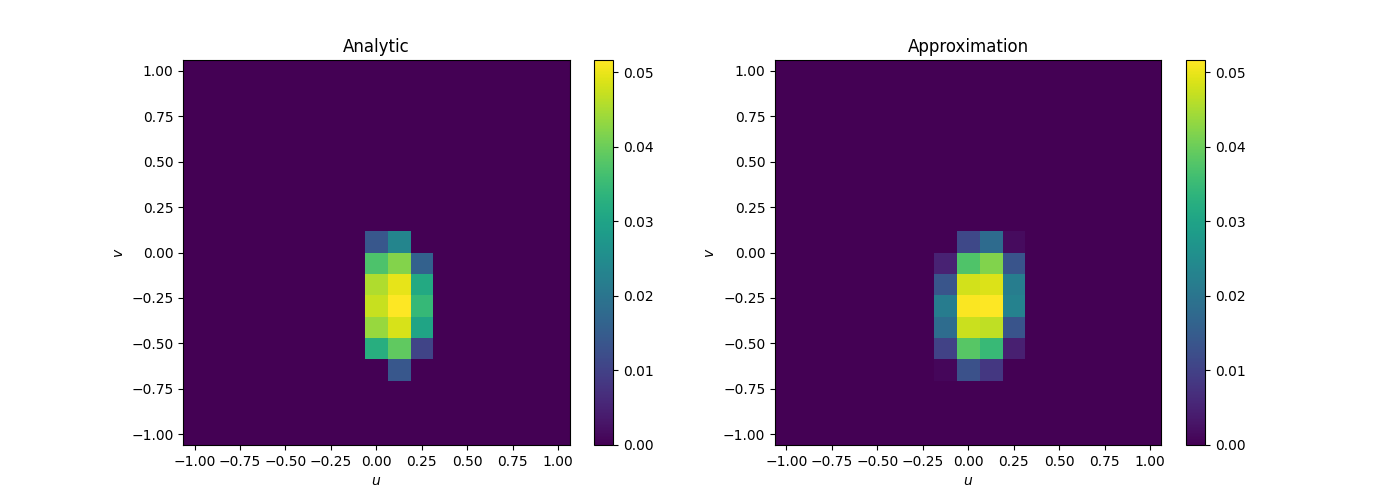

In [16]:
fig, ax = plt.subplots(figsize=(14, 5), ncols=2)
im0 = grid_uv.plot(ax[0], e3_4_proj)
ax[0].set_xlabel(f'$u$')
ax[0].set_ylabel(f'$v$')
ax[0].set_title('Analytic')
plt.colorbar(im0, ax=ax[0])
im1 = grid_uv.plot(ax[1], e3_4_proj_approx)
plt.colorbar(im0, ax=ax[1])
ax[1].set_xlabel(f'$u$')
ax[1].set_ylabel(f'$v$')
ax[1].set_title('Approximation');

In [17]:
p3_proj = p3.proj(theta_deg, phi_deg, grid_uv, deg=True)

In [18]:
X_p3 = p3(c_x.flatten(), c_y.flatten(), c_z.flatten())
X_p3.shape = axes3.shape

In [19]:
p3_proj_approx = A @ X_p3.flat
p3_proj_approx.shape = Nv, Nu

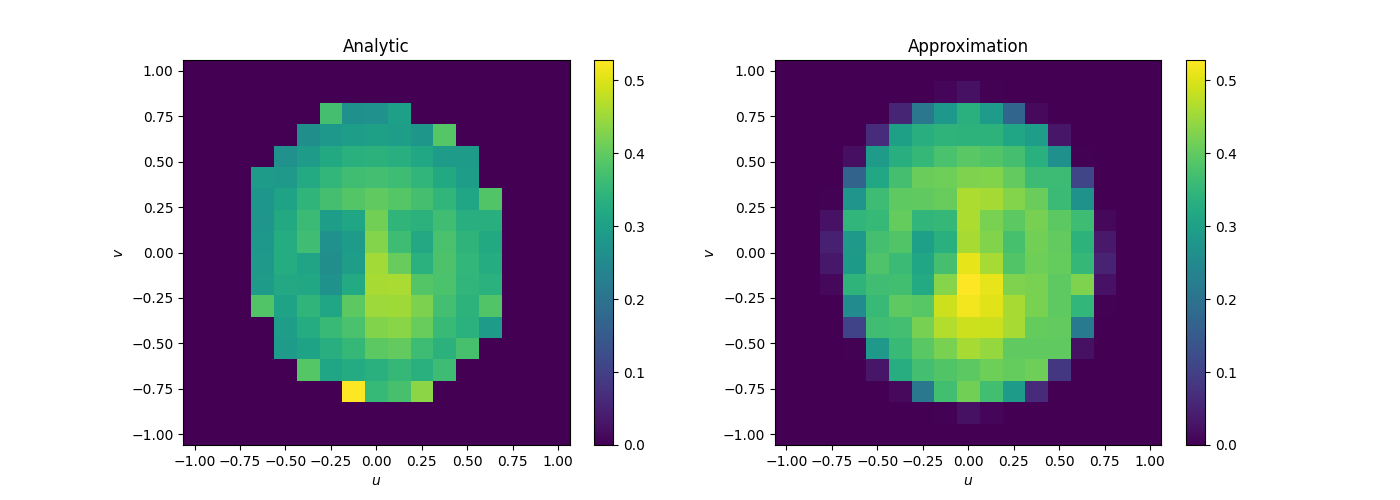

In [20]:
fig, ax = plt.subplots(figsize=(14, 5), ncols=2)
im0 = grid_uv.plot(ax[0], p3_proj)
plt.colorbar(im0, ax=ax[0])
ax[0].set_xlabel(f'$u$')
ax[0].set_ylabel(f'$v$')
ax[0].set_title('Analytic')
im1 = grid_uv.plot(ax[1], p3_proj_approx)
plt.colorbar(im0, ax=ax[1])
ax[1].set_xlabel(f'$u$')
ax[1].set_ylabel(f'$v$')
ax[1].set_title('Approximation');